In [1]:
import torchdata.datapipes as dp
from torch.utils.data.datapipes.utils.decoder import imagehandler
from tqdm.auto import tqdm

In [2]:
S3URL = 's3://ml-ops-datasets/MPE/surgeon/crops_per_group/train/nut/bad/'

def S3_pipe(S3url):
    bucket = '/'.join(S3URL.split('/')[:3]) + '/'
    def s3_url_hack(path): return path.replace(S3url, bucket)

    return (
        dp.iter.IoPathFileLister(root=S3url)
        .map(s3_url_hack) # hack to fix path doubling
        .open_file_by_iopath(mode="rb")
        .routed_decode(imagehandler('pil'))
        .in_memory_cache()
    )
datapipe = S3_pipe(S3URL)

In [4]:
for epoch in tqdm(range(5)):
    for path, file in tqdm(datapipe):
        pass

  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

s3://ml-ops-datasets/MPE/surgeon/crops_per_group/train/nut/bad/1644853009153_left_RT_nut_4.jpg


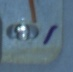

In [5]:
print(path)
file

## TODO: Figure out disk cache

In [27]:
# https://pytorch.org/data/main/generated/torchdata.datapipes.iter.OnDiskCacheHolder.html

S3URL = 's3://ml-ops-datasets/MPE/surgeon/crops_per_group/train/nut/bad/'

def S3_pipe(S3url):
    import os

    bucket = '/'.join(S3URL.split('/')[:3]) + '/'
    def _s3_url_hack(path): return path.replace(S3url, bucket)
    def _filepath_fn(url): return os.path.join('tmp', os.path.basename(url))

    return (
        dp.iter.IoPathFileLister(root=S3url)
        .map(_s3_url_hack) # hack to fix path doubling
        .on_disk_cache(filepath_fn=_filepath_fn)
        .open_file_by_iopath(mode="rb")
        .routed_decode(imagehandler('pil'))
        .end_caching(mode="wb", filepath_fn=_filepath_fn)
    )
datapipe = S3_pipe(S3URL)

In [28]:
for epoch in tqdm(range(5)):
    for path, file in tqdm(datapipe):
        pass

  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

TypeError: can only join an iterable